In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
install.packages('tidyverse')

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/tidyverse_1.3.1.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 702779 bytes (686 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wr

In [ ]:
%%R
data=read.csv('Steel_industry_data.csv')

In [ ]:
%%R
head(data)

              date Usage_kWh Lagging_Current_Reactive.Power_kVarh
1 01/01/2018 00:15      3.17                                 2.95
2 01/01/2018 00:30      4.00                                 4.46
3 01/01/2018 00:45      3.24                                 3.28
4 01/01/2018 01:00      3.31                                 3.56
5 01/01/2018 01:15      3.82                                 4.50
6 01/01/2018 01:30      3.28                                 3.56
  Leading_Current_Reactive_Power_kVarh CO2.tCO2. Lagging_Current_Power_Factor
1                                    0         0                        73.21
2                                    0         0                        66.77
3                                    0         0                        70.28
4                                    0         0                        68.09
5                                    0         0                        64.72
6                                    0         0                      

In [ ]:
%%R
dim(data)

[1] 35040    11


In [ ]:
# checking for NA values in the dataset
%%R
na_count = sapply(data, function(y) sum(length(which(is.na(y)))))
na_count = data.frame(na_count)
na_count


                                     na_count
date                                        0
Usage_kWh                                   0
Lagging_Current_Reactive.Power_kVarh        0
Leading_Current_Reactive_Power_kVarh        0
CO2.tCO2.                                   0
Lagging_Current_Power_Factor                0
Leading_Current_Power_Factor                0
NSM                                         0
WeekStatus                                  0
Day_of_week                                 0
Load_Type                                   0


In [ ]:
%%R
library(tidyverse)
df1 = data %>% mutate(dummy=1) %>%
spread(key=WeekStatus,value=dummy, fill=0)
df2 = data %>% mutate(dummy=1) %>%
spread(key=Day_of_week,value=dummy, fill=0)
df3 = data %>% mutate(dummy=1) %>%
spread(key=Load_Type,value=dummy, fill=0)

data$Weekday = df1$Weekday
data$Weekend = df1$Weekend
data$Friday = df2$Friday
data$Monday = df2$Monday
data$Saturday = df2$Saturday
data$Sunday = df2$Sunday
data$Thursday = df2$Thursday
data$Tuesday = df2$Tuesday
data$Wednesday = df2$Wednesday
data$Light_Load = df3$Light_Load
data$Maximum_Load = df3$Maximum_Load
data$Medium_Load = df3$Medium_Load
print(head(data))

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

R[write to console]: ✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.0     ✔ forcats 0.5.1

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



              date Usage_kWh Lagging_Current_Reactive.Power_kVarh
1 01/01/2018 00:15      3.17                                 2.95
2 01/01/2018 00:30      4.00                                 4.46
3 01/01/2018 00:45      3.24                                 3.28
4 01/01/2018 01:00      3.31                                 3.56
5 01/01/2018 01:15      3.82                                 4.50
6 01/01/2018 01:30      3.28                                 3.56
  Leading_Current_Reactive_Power_kVarh CO2.tCO2. Lagging_Current_Power_Factor
1                                    0         0                        73.21
2                                    0         0                        66.77
3                                    0         0                        70.28
4                                    0         0                        68.09
5                                    0         0                        64.72
6                                    0         0                      

In [ ]:
# categorical columns since we convert into numerical
%%R
df = data
df = subset(df, select = -c(WeekStatus,Day_of_week,Load_Type))
head(df)

              date Usage_kWh Lagging_Current_Reactive.Power_kVarh
1 01/01/2018 00:15      3.17                                 2.95
2 01/01/2018 00:30      4.00                                 4.46
3 01/01/2018 00:45      3.24                                 3.28
4 01/01/2018 01:00      3.31                                 3.56
5 01/01/2018 01:15      3.82                                 4.50
6 01/01/2018 01:30      3.28                                 3.56
  Leading_Current_Reactive_Power_kVarh CO2.tCO2. Lagging_Current_Power_Factor
1                                    0         0                        73.21
2                                    0         0                        66.77
3                                    0         0                        70.28
4                                    0         0                        68.09
5                                    0         0                        64.72
6                                    0         0                      

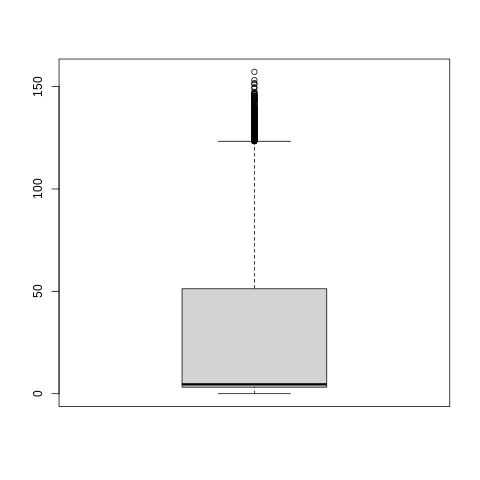

In [ ]:
# Identifying outliers
%%R
boxplot(df$Usage_kWh)

In [ ]:
%%R
outliers = boxplot(df$Usage_kWh, plot=FALSE)$out
df = df[-which(df$Usage_kWh %in% outliers),]

In [ ]:
%%R
dim(df)

[1] 34715    20


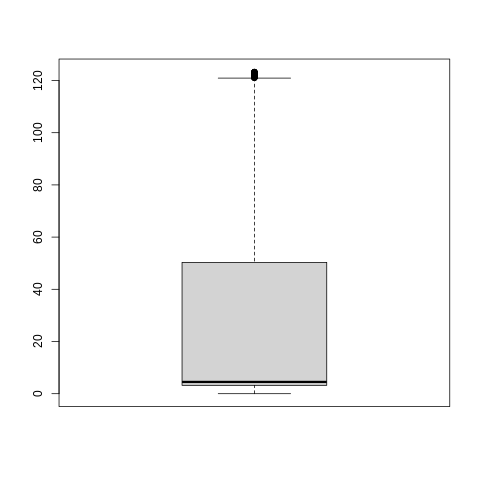

In [ ]:
%%R
boxplot(df$Usage_kWh)

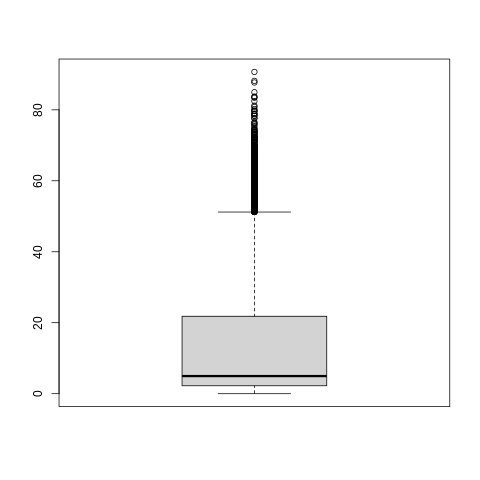

In [ ]:
%%R
boxplot(df$Lagging_Current_Reactive.Power_kVarh)

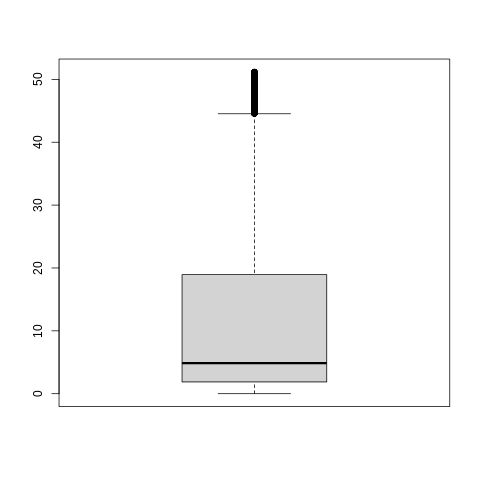

In [ ]:
%%R
outliers = boxplot(df$Lagging_Current_Reactive.Power_kVarh, plot=FALSE)$out
df = df[-which(df$Lagging_Current_Reactive.Power_kVarh %in% outliers),]
boxplot(df$Lagging_Current_Reactive.Power_kVarh)

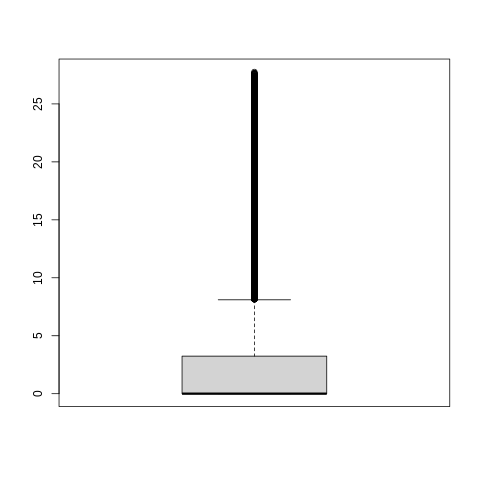

In [ ]:
%%R
boxplot(df$Leading_Current_Reactive_Power_kVarh)

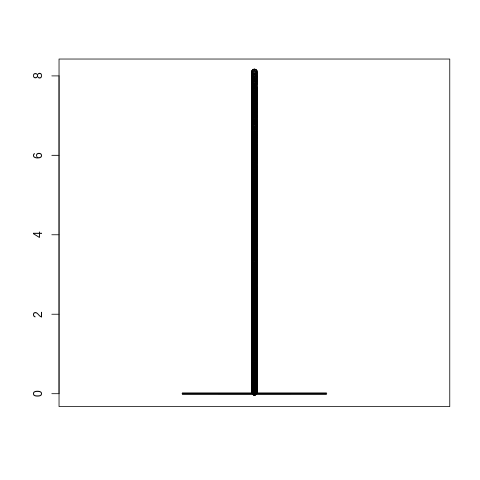

In [ ]:
%%R
outliers = boxplot(df$Leading_Current_Reactive_Power_kVarh, plot=FALSE)$out
df = df[-which(df$Leading_Current_Reactive_Power_kVarh %in% outliers),]
boxplot(df$Leading_Current_Reactive_Power_kVarh)

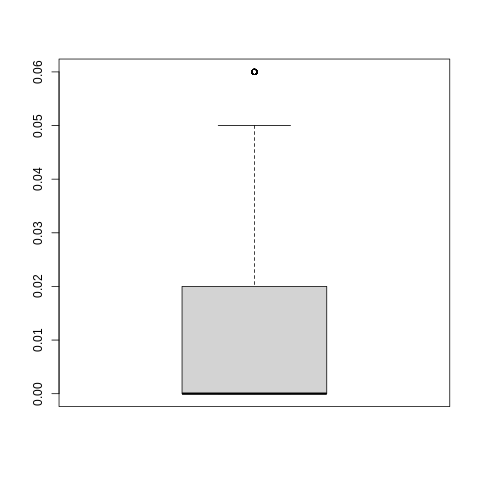

In [ ]:
%%R
boxplot(df$CO2.tCO2.)

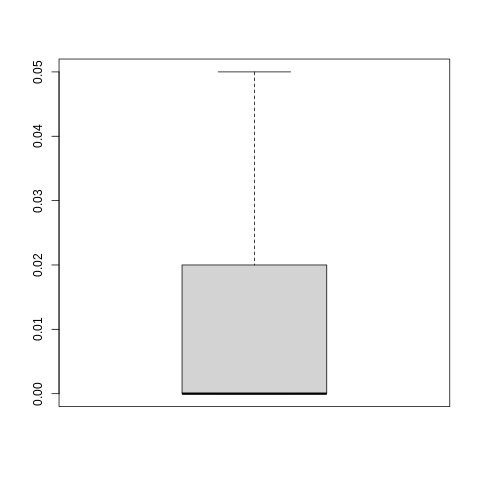

In [ ]:
%%R
outliers = boxplot(df$CO2.tCO2., plot=FALSE)$out
df = df[-which(df$CO2.tCO2. %in% outliers),]
boxplot(df$CO2.tCO2.)

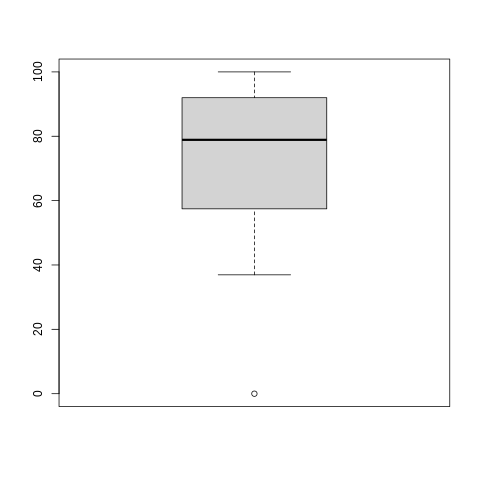

In [ ]:
%%R
boxplot(df$Lagging_Current_Power_Factor)

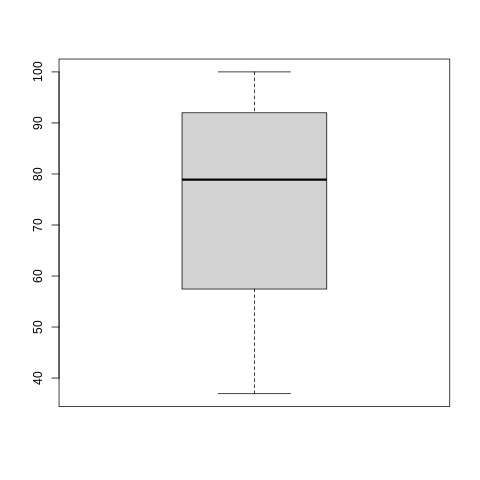

In [ ]:
%%R
outliers = boxplot(df$Lagging_Current_Power_Factor, plot=FALSE)$out
df = df[-which(df$Lagging_Current_Power_Factor %in% outliers),]
boxplot(df$Lagging_Current_Power_Factor)

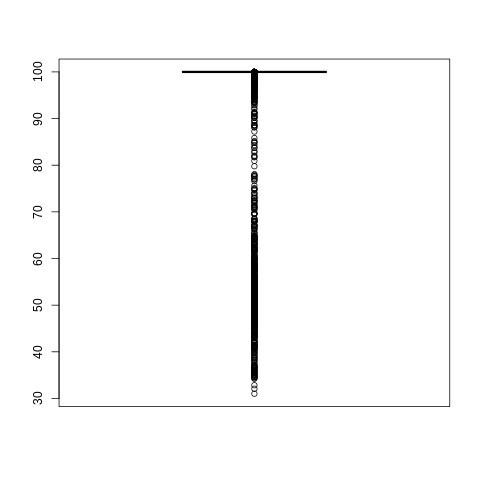

In [ ]:
%%R
boxplot(df$Leading_Current_Power_Factor)

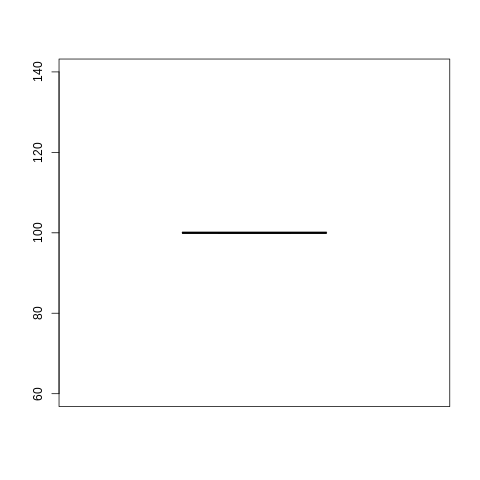

In [ ]:
%%R
outliers = boxplot(df$Leading_Current_Power_Factor, plot=FALSE)$out
df = df[-which(df$Leading_Current_Power_Factor %in% outliers),]
boxplot(df$Leading_Current_Power_Factor)

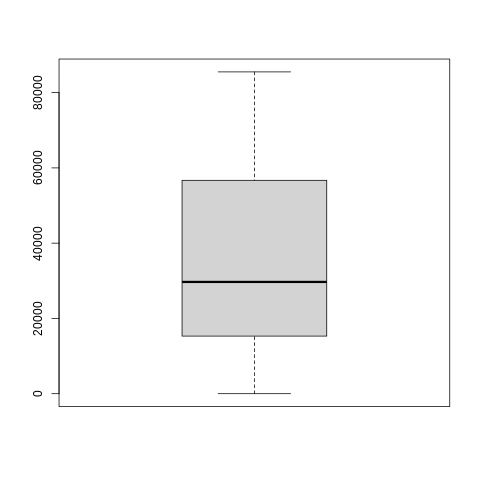

In [ ]:
%%R
boxplot(df$NSM)

In [ ]:
%%R
dim(df)

[1] 23042    20


In [ ]:
%%R
str(df)

'data.frame':	23042 obs. of  20 variables:
 $ date                                : chr  "01/01/2018 00:15" "01/01/2018 00:30" "01/01/2018 00:45" "01/01/2018 01:00" ...
 $ Usage_kWh                           : num  3.17 4 3.24 3.31 3.82 3.28 3.6 3.6 3.28 3.78 ...
 $ Lagging_Current_Reactive.Power_kVarh: num  2.95 4.46 3.28 3.56 4.5 3.56 4.14 4.28 3.64 4.72 ...
 $ Leading_Current_Reactive_Power_kVarh: num  0 0 0 0 0 0 0 0 0 0 ...
 $ CO2.tCO2.                           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Lagging_Current_Power_Factor        : num  73.2 66.8 70.3 68.1 64.7 ...
 $ Leading_Current_Power_Factor        : num  100 100 100 100 100 100 100 100 100 100 ...
 $ NSM                                 : int  900 1800 2700 3600 4500 5400 6300 7200 8100 9000 ...
 $ Weekday                             : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Weekend                             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Friday                              : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Monday              

In [ ]:
%%R
df = subset(df, select = -date)
str(df)

'data.frame':	23042 obs. of  19 variables:
 $ Usage_kWh                           : num  3.17 4 3.24 3.31 3.82 3.28 3.6 3.6 3.28 3.78 ...
 $ Lagging_Current_Reactive.Power_kVarh: num  2.95 4.46 3.28 3.56 4.5 3.56 4.14 4.28 3.64 4.72 ...
 $ Leading_Current_Reactive_Power_kVarh: num  0 0 0 0 0 0 0 0 0 0 ...
 $ CO2.tCO2.                           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Lagging_Current_Power_Factor        : num  73.2 66.8 70.3 68.1 64.7 ...
 $ Leading_Current_Power_Factor        : num  100 100 100 100 100 100 100 100 100 100 ...
 $ NSM                                 : int  900 1800 2700 3600 4500 5400 6300 7200 8100 9000 ...
 $ Weekday                             : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Weekend                             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Friday                              : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Monday                              : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Saturday                            : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Sunday

In [ ]:
%%R
install.packages('Hmisc')

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/Hmisc_4.6-0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 784633 bytes (766 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write 

In [ ]:
%%R
library(Hmisc)
hist.data.frame(df)

R[write to console]: Error in library(Hmisc) : there is no package called ‘Hmisc’

R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: 
R[write to console]: In system("timedatectl", intern = TRUE) :
R[write to console]: 
 
R[write to console]:  running command 'timedatectl' had status 1

R[write to console]: 2: 
R[write to console]: In install.packages("Hmisc") :
R[write to console]: 
 
R[write to console]:  installation of package ‘Hmisc’ had non-zero exit status




Error in library(Hmisc) : there is no package called ‘Hmisc’


RInterpreterError: ignored

In [ ]:
%%R
lm1 = lm(Usage_kWh ~ ., data = df)
summary(lm1)


Call:
lm(formula = Usage_kWh ~ ., data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.733  -0.888   0.234   0.913  98.519 

Coefficients: (5 not defined because of singularities)
                                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          -1.470e+00  2.789e-01  -5.272 1.36e-07 ***
Lagging_Current_Reactive.Power_kVarh  2.161e-01  4.983e-03  43.368  < 2e-16 ***
Leading_Current_Reactive_Power_kVarh  2.965e+00  6.360e-01   4.661 3.16e-06 ***
CO2.tCO2.                             1.753e+03  5.877e+00 298.212  < 2e-16 ***
Lagging_Current_Power_Factor          9.271e-02  3.119e-03  29.720  < 2e-16 ***
Leading_Current_Power_Factor                 NA         NA      NA       NA    
NSM                                  -4.059e-06  1.587e-06  -2.558  0.01054 *  
Weekday                               6.877e-02  1.220e-01   0.563  0.57310    
Weekend                                      NA         NA      NA       NA    
Frid

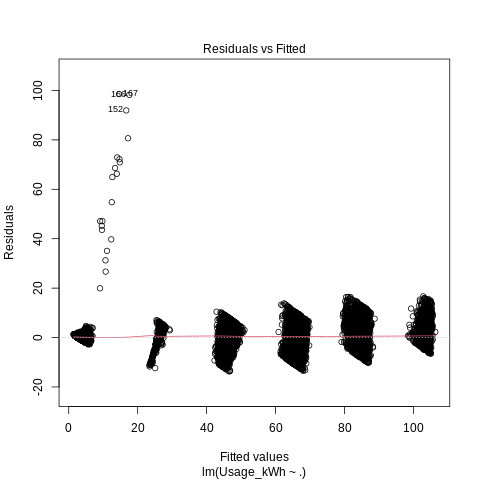

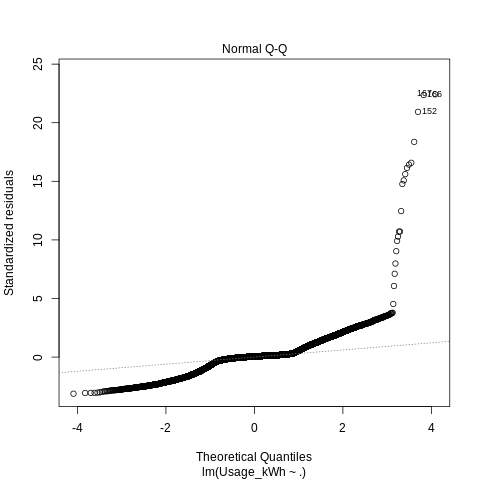

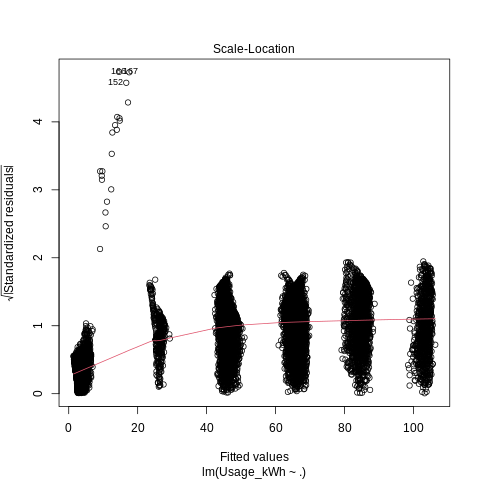

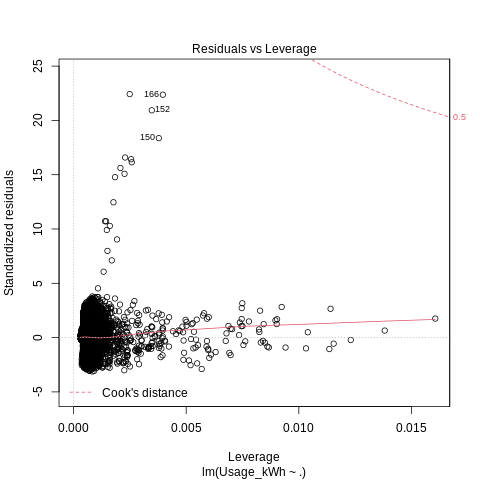

In [ ]:
%%R
plot(lm1)